In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [49]:
print ("shape of dataset: ", df.shape)
df.head()

shape of dataset:  (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [51]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [52]:
df.duplicated().sum() #duplicate rows 

0

In [53]:
df.nunique() #unique values per column 

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [54]:
df = df.drop(['veil-type'], axis=1) # drop since it has only one unique value
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [55]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [56]:
for col in df.columns:
    unique_vals = df[col].unique()
    if '?' in unique_vals:
        print(f"'{col}'contains ?") 
        print (f"Unique values in '{col}': {unique_vals}")

'stalk-root'contains ?
Unique values in 'stalk-root': ['e' 'c' 'b' 'r' '?']


In [57]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [58]:
(df['stalk-root'] == '?').sum() # count of '?' in 'stalk-root' column

2480

In [59]:
# 2480 is 30.53% of 8124, comparing between drop and predictive imputation:
df_predictive = df.copy()
df_drop = df.drop('stalk-root', axis = 1)

In [60]:
print(df_predictive['stalk-root'].isnull().sum())

0


In [61]:
#Replace placeholder '?' with np.nan
df_predictive.replace('?', np.nan, inplace = True)

#Fill missing with placeholder for encoding
df_predictive.fillna('missing', inplace = True )

In [62]:
#Split rows
df_missing = df_predictive[df_predictive['stalk-root'] == 'missing'].copy()
df_not_missing = df_predictive [df_predictive['stalk-root'] != 'missing'].copy()

from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in df_predictive.columns:
    if col not in ['stalk-root','class']:
        le = LabelEncoder()
        le.fit(df_predictive[col])
        df_not_missing[col] = le.transform(df_not_missing[col])
        df_missing[col] = le.transform(df_missing[col])
        le_dict[col] = le 

In [63]:
#Encode stalk-root target for training 
le_sr = LabelEncoder()
df_not_missing['stalk-root'] = le_sr.fit_transform(df_not_missing['stalk-root'])

In [64]:
# Train model
from sklearn.ensemble import RandomForestClassifier

X_train = df_not_missing.drop(['stalk-root','class'], axis=1)
y_train = df_not_missing['stalk-root']

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict missing values and fill back
X_missing = df_missing.drop(['stalk-root','class'],axis=1)
predicted_values = le_sr.inverse_transform(rf.predict(X_missing))
df_predictive.loc[df_predictive['stalk-root'] == 'missing', 'stalk-root'] = predicted_values

In [65]:
#Encode 'class' (target)
le_class = LabelEncoder()
df_drop['class'] = le_class.fit_transform(df_drop['class'])
df_predictive['class'] = le_class.transform(df_predictive['class'])

#OHE for features 
X_drop = pd.get_dummies(df_drop.drop('class', axis=1))
y_drop = df_drop['class']

X_pred = pd.get_dummies(df_predictive.drop('class', axis = 1))
y_pred = df_predictive['class']

#Align columns to ensure same structure 
X_drop, X_pred = X_drop.align(X_pred, join = 'inner', axis = 1)

In [66]:
#Train and Compare Models 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Drop version
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drop, y_drop, test_size=0.2, random_state=42)
clf_drop = RandomForestClassifier(random_state=42)
clf_drop.fit(X_train_d, y_train_d)
acc_drop = accuracy_score(y_test_d, clf_drop.predict(X_test_d))

# Predictive version
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pred, y_pred, test_size=0.2, random_state=42)
clf_pred = RandomForestClassifier(random_state=42)
clf_pred.fit(X_train_p, y_train_p)
acc_pred = accuracy_score(y_test_p, clf_pred.predict(X_test_p))

In [67]:
print(f"Accuracy (Drop'stalk-root'):     {acc_drop:.4f}")
print (f"Accuracy(Predictive Imputation): {acc_pred:.4f}")

Accuracy (Drop'stalk-root'):     1.0000
Accuracy(Predictive Imputation): 1.0000


In [68]:
print(df_predictive.head())  # Should be full, no NaNs
print(df_predictive.isnull().sum())  # Should be mostly 0

   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-above-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                     

In [69]:
mapping_dict = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple',
                  'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty',
             'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'f': 'free'},
    'gill-spacing': {'c': 'close', 'w': 'crowded'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange',
                  'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'missing', 'e': 'equal', 'r': 'rooted'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink',
                               'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink',
                               'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'green', 'o': 'orange',
                          'r': 'purple', 'u': 'white', 'w': 'yellow', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'d': 'desert', 'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste'}
}
for col, mapping in mapping_dict.items():
    if col in df_predictive.columns:
        df_predictive[col] = df_predictive[col].map(mapping)

In [70]:
df_predictive['class'] = df['class'].map({'e': 'edible', 'p': 'poisonous'})

In [71]:
df_predictive.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [72]:
print(df_predictive['class'].isnull().sum()) 

0


In [73]:
#Temporarily Encode All Columns 
from sklearn.preprocessing import LabelEncoder

df_encoded = df_predictive.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

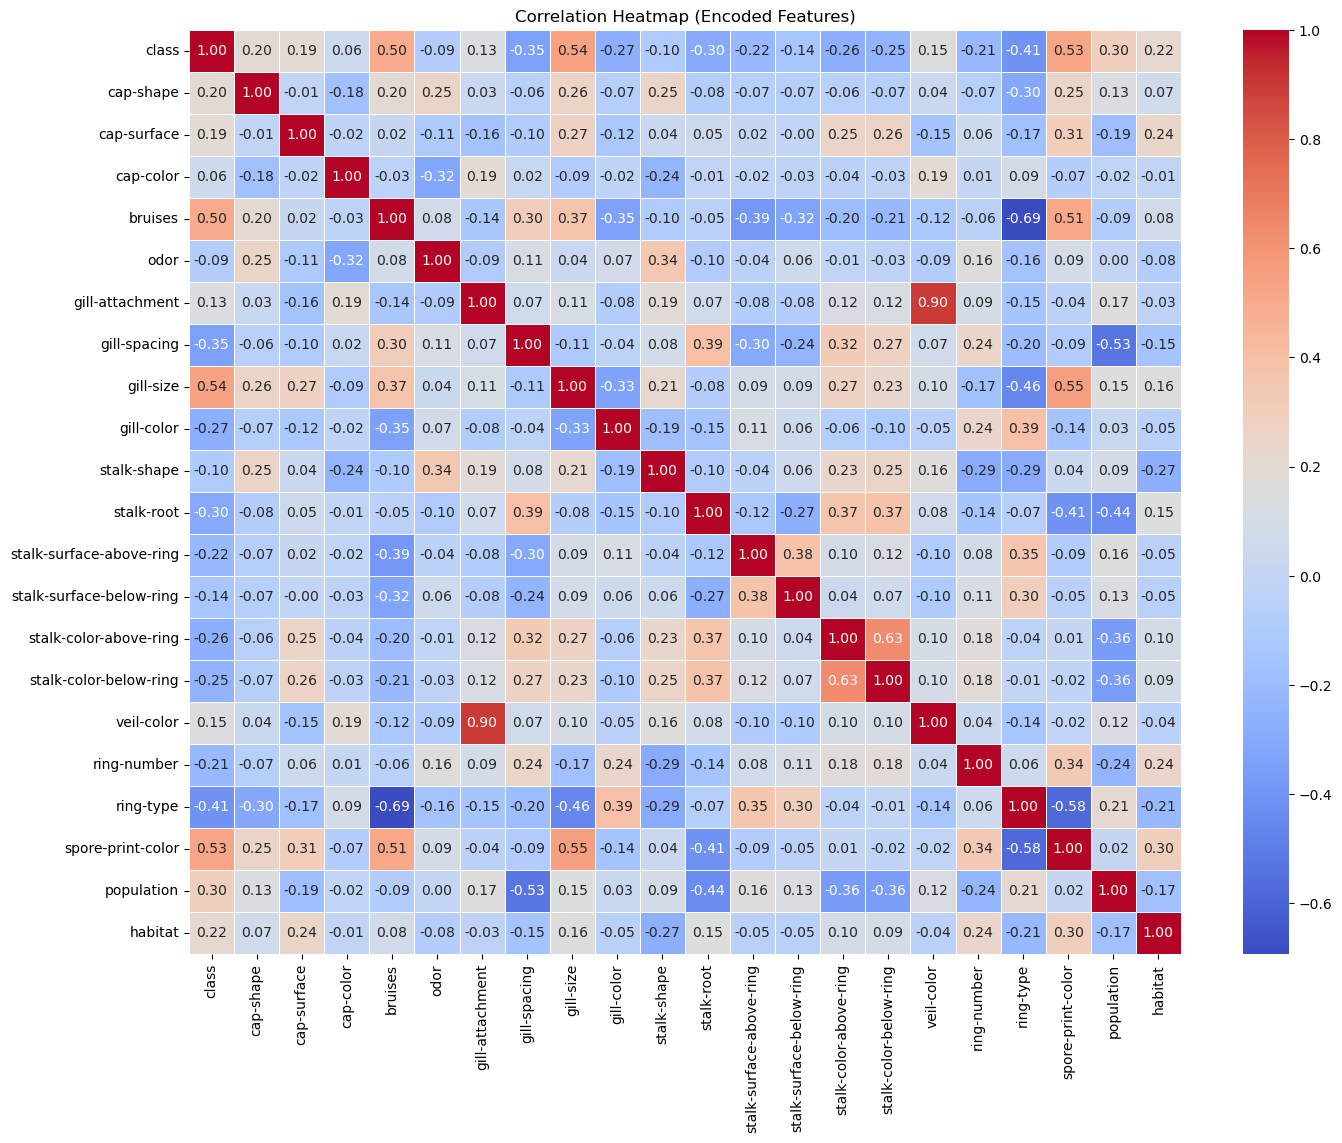

In [74]:
# Plot Correlation Heatmap 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()


All Features: 
- cap-shape: 0.2 (keep)
- cap-surface: 0.19 (keep)
- cap-color: 0.06 (drop)
- bruises: 0.50 (keep)
- odor: -0.09 (drop)
- gill-attachment: 0.13 (drop)
- gill-spacing: -0.35 (keep)
- gill-size: 0.54 (keep)
- gill-color: -0.27 (keep)
- stalk-shape:-0.10 (drop)
- stalk-root: -0.30 (keep)
- stalk-surface-above-ring: -0.22
- stalk-surface-below-ring: -0.14
- stalk-color-above-ring: -0.26
- stalk-color-below-ring: -0.25
- veil-color: 0.15
- ring-number: -0.21
- ring-type: -0.41 (keep)
- spore-print-color: 0.53 (keep)
- population: 0.30 (keep)
- habitat: 0.22 (keep)

Key Insights from Heatmap:
- Highest correlation features with class: 
- bruises(0.50)
- gill-size(0.54)
- spore-print-color(0.53)

- ring-type(-0.41) 
- gill-spacing (-0.35)


In [75]:
#Drop weak or redundant features 
df_selected = df_predictive.copy()
df_selected.drop([
    'cap-color', 
    'stalk-shape', 
    'odor', 
    'gill-attachment'
], axis=1, inplace=True)

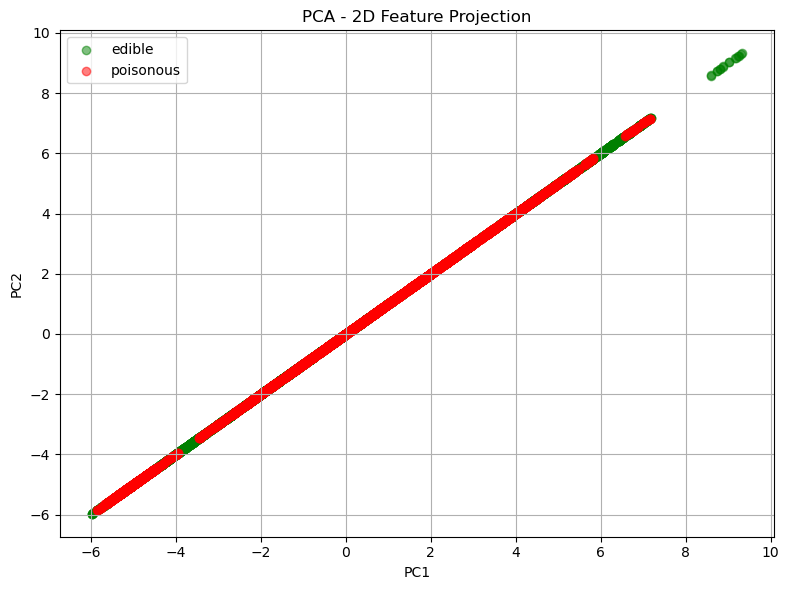

In [76]:
# PCA Visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Encode again teporarily for PCA
df_encoded = df_selected.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

#Separate target from features 
X = df_encoded.drop('class',axis = 1)
y = df_encoded['class']

#Apply PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

#Plot PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y == 0], X_pca[y == 0], c='green', label='edible', alpha=0.5)
plt.scatter(X_pca[y == 1], X_pca[y == 1], c='red', label='poisonous', alpha=0.5)
plt.title('PCA - 2D Feature Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
#Final Encoding for Modeling
from sklearn.preprocessing import LabelEncoder

df_final = df_selected.copy() #from step 2.5 (after dropping weak features)
le_class = LabelEncoder() 
df_final['class'] = le_class.fit_transform(df_final['class'])

In [78]:
#One-Hot Encoding for Features
X = pd.get_dummies(df_final.drop('class', axis = 1))
y = df_final['class']

In [79]:
#Final Check before Model Training
print(X.shape) #Number of features after OHE
print(y.value_counts()) #Check Label balance

(8124, 91)
class
0    4208
1    3916
Name: count, dtype: int64


In [80]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) 
#test_size=0.2 -> 20% of data for testing, 80% for training
#stratify=y -> keeps the edible/poisonous ratio balanced 

In [81]:
#Train a Baseline Model 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
#Evaluate the Model 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

#Predict on test set
y_pred = model.predict(X_test)

#Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

#Detailed Report
print(classification_report(y_test, y_pred, target_names = ['edible', 'poisonous']))

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0000
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[842   0]
 [  0 783]]


In [83]:
#Training Models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

print("Baseline Model Accuracy:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

Baseline Model Accuracy:
RandomForest: 1.0000
DecisionTree: 1.0000
LogisticRegression: 0.9920


In [84]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = models["RandomForest"] 
y_pred_best = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=["edible", "poisonous"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_best))


Classification Report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[842   0]
 [  0 783]]


In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# Evaluate tuned model
y_pred_tuned = grid.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Random Forest Accuracy: {acc_tuned:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest Accuracy: 1.0000


In [86]:
#Get feature importances 
importances = best_model.feature_importances_
feature_names = X.columns


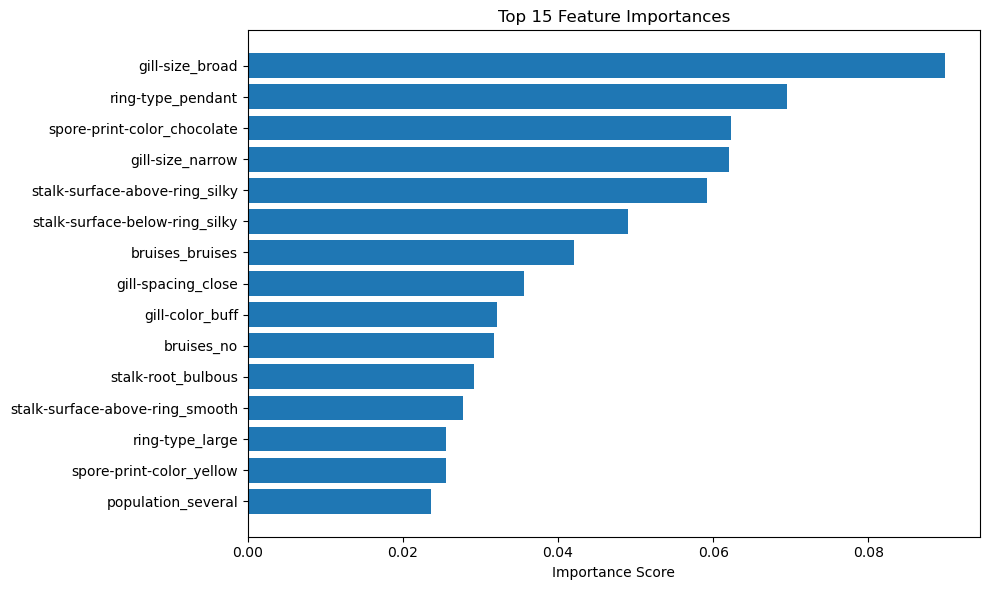

In [87]:
#create a DataFrame of features and importances 
feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

#Sort and take top 15
top_features = feature_df.sort_values (by='importance', ascending=False).head(15)

#Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()
plt.show()

In [88]:
import joblib

#Save Model 
joblib.dump(best_model, 'mushroom_model.pkl')

#Save Label encoder for 'class'
joblib.dump(le_class,'class_encoder.pkl')

['class_encoder.pkl']

In [89]:
best_model.feature_names_in_

array(['cap-shape_bell', 'cap-shape_conical', 'cap-shape_convex',
       'cap-shape_flat', 'cap-shape_knobbed', 'cap-shape_sunken',
       'cap-surface_fibrous', 'cap-surface_grooves', 'cap-surface_scaly',
       'cap-surface_smooth', 'bruises_bruises', 'bruises_no',
       'gill-spacing_close', 'gill-spacing_crowded', 'gill-size_broad',
       'gill-size_narrow', 'gill-color_black', 'gill-color_brown',
       'gill-color_buff', 'gill-color_chocolate', 'gill-color_gray',
       'gill-color_green', 'gill-color_orange', 'gill-color_pink',
       'gill-color_purple', 'gill-color_red', 'gill-color_white',
       'gill-color_yellow', 'stalk-root_bulbous', 'stalk-root_club',
       'stalk-root_equal', 'stalk-root_rooted',
       'stalk-surface-above-ring_fibrous',
       'stalk-surface-above-ring_scaly', 'stalk-surface-above-ring_silky',
       'stalk-surface-above-ring_smooth',
       'stalk-surface-below-ring_fibrous',
       'stalk-surface-below-ring_scaly', 'stalk-surface-below-ring_silk